<a href="https://colab.research.google.com/github/szymonszwedzinskiii/DataTemplates/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [26]:
N, D = 200, 2
SEED = 54321
X,y = datasets.make_classification(n_samples=N,n_features=D,n_informative=2,n_redundant=0,random_state=SEED)

X = np.reshape(X, (N, D))
y = np.reshape(y, (N, 1))



In [27]:
df = pd.DataFrame({
    "X_1": X[:,0],
    "X_2":X[:,1],
    "label": ["positive" if y_i>0 else "negative" for y_i in y]
},index = list(range(N)))

df

,X_1,X_2,label
0,1.434174,-0.593742,negative
1,-0.546980,-1.061760,negative
2,0.651044,0.868971,positive
3,0.249456,-1.033361,negative
4,-1.047607,-0.693791,negative
...,...,...,...
195,-0.922138,-2.105524,negative
196,-1.309470,0.949647,positive
197,0.617753,0.751026,positive
198,-1.028913,-1.058349,negative


In [28]:
import plotly.express as px

In [29]:
px.scatter(df,x="X_1", y="X_2",color="label")

In [68]:
def sigmoid(x):
  x = np.clip(x,-500,500)
  return 1/(1 + np.exp(-x))

In [31]:
w= np.array([1.0,2.0])
b = 3.0

w = np.reshape(w, (D,1))


In [32]:
def model(x,w,b):
  logits = np.matmul(x,w) + b
  return sigmoid(logits)

y_pred = model(X,w,b)
print(f" ypred= {list(y_pred)}\n target = {list(y)}")

 ypred= [array([0.96255394]), array([0.58163786]), array([0.99545416]), array([0.7654388]), array([0.63756511]), array([0.90655028]), array([0.68183605]), array([0.99970337]), array([0.99602785]), array([0.99886228]), array([0.99874445]), array([0.98742783]), array([0.99569272]), array([0.12613896]), array([0.99651059]), array([0.99939227]), array([0.98951685]), array([0.9987425]), array([0.36453962]), array([0.1798007]), array([0.48961909]), array([0.99990902]), array([0.99823066]), array([0.99246094]), array([0.08460181]), array([0.9997655]), array([0.93948398]), array([0.97107314]), array([0.19367404]), array([0.76322313]), array([0.8418852]), array([0.99665178]), array([0.98706398]), array([0.91231358]), array([0.93236033]), array([0.57664026]), array([0.07117296]), array([0.9514529]), array([0.55372966]), array([0.99998265]), array([0.98752226]), array([0.95022756]), array([0.94350697]), array([0.99538145]), array([0.98712502]), array([0.99944174]), array([0.28763706]), array([0.0

In [33]:
def plot(w,b):
  import plotly.graph_objects as go
  def get_points(w,b,x1,x2):
    A,B = w[0,0], w[1,0]
    C= b
    return {
        "x":[x1,x2],
        "y":[(C-A*x1)/B, (C-A*x2)/B]
    }
  fig1 = px.scatter(df,x='X_1',y="X_2",color="label")
  fig2= go.Figure(go.Scatter(**get_points(w,b,-2,4), name="brzeg"))
  return go.Figure(data=fig1.data + fig2.data)

In [34]:
plot(w,b)

In [73]:
def cross_entropy(y_pred,target):
  epsilon = 1e-15
  y_pred = np.clip(y_pred,epsilon,1-epsilon)
  return -np.mean(target * np.log(y_pred) + (1-target) * np.log(1-y_pred))


In [36]:
def compute_costs(X,y,w,b):
  y_pred = model(X,w,b)
  return cross_entropy(y_pred,y)


In [37]:
compute_costs(X,y,w,b)

np.float64(1.027921502033809)

In [38]:
def compute_gradient(X,y,w,b):
  n = len(X)
  y_pred = model(X,w,b)
  dw = (1/n) * np.matmul(X.T,(y_pred-y))
  db = (1/n) * np.sum(y_pred-y)
  return dw,db

In [39]:
compute_gradient(X,y,w,b)



(array([[ 0.20607611],
        [-0.15604127]]),
 np.float64(0.294252928552664))

In [40]:
def step_gradient(data_x, data_y,w_current,b_current,alpha):
  dw,db = compute_gradient(data_x,data_y,w_current,b_current)
  w_new = w_current - alpha * dw
  b_new = b_current - alpha * db
  return w_new,b_new


In [41]:
w_before, b_before = w,b
cost_before = compute_costs(X,y,w_before,b_before)
w_after, b_after = step_gradient(X,y,w_before,b_before,0.1)
cost_after = compute_costs(X,y,w_after,b_after)
print(f"cost before = {cost_before}\n cost after = {cost_after}")

cost before = 1.027921502033809
 cost after = 1.0126587031707026


In [42]:
w_before, b_before = w,b
cost_before = compute_costs(X,y,w_before,b_before)
w_after, b_after = step_gradient(X,y,w_before,b_before,1.0)
cost_after = compute_costs(X,y,w_after,b_after)
print(f"cost before = {cost_before}\n cost after = {cost_after}")

cost before = 1.027921502033809
 cost after = 0.8823548482348891


In [43]:
print(w_before,b_before)
print(w_after,b_after)

[[1.]
 [2.]] 3.0
[[0.79392389]
 [2.15604127]] 2.705747071447336


Plot before 1 step

---



In [44]:
plot(w_after,b_after)

Plot after 1 step

In [45]:
plot(w_before,b_before)

In [46]:
def training(data_x,data_y,w_init,b_init,alpha,num_eopchs):
  w=w_init
  b = b_init

  cost_history=[]

  w_history=[]
  b_history =[]
  for i in range(num_eopchs):
    cost_history.append(compute_costs(data_x,data_y,w,b))
    w_history.append(w)
    b_history.append(b)
    w,b = step_gradient(data_x,data_y,w,b,alpha)
    cost = compute_costs(data_x,data_y,w,b)
    cost_history.append(cost)
  return cost_history, w_history,b_history


In [74]:
cost_history, w_history,b_history = training(X,y,w,b,0.1,20)
print(f'first cost = {cost_history[0]}, cost after 20 epochs and alpha =0.01 = {cost_history[-1]}')

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 7)

In [48]:
cost_history, w_history,b_history = training(X,y,w,b,0.1,100)
print(f'first cost = {cost_history[0]}, cost after 100 and alpha =0.01 epochs = {cost_history[-1]}')

first cost = 1.027921502033809, cost after 100 and alpha =0.01 epochs = 0.3783349737244731


In [49]:
cost_history, w_history,b_history = training(X,y,w,b,1,20)
print(f'first cost = {cost_history[0]}, cost after 20 epochs and alpha =1 = {cost_history[-1]}')

first cost = 1.027921502033809, cost after 20 epochs and alpha =1 = 0.29649513318300824


Plot for trained data with cost ~0.2964

In [50]:
plot(w_history[-1],b_history[-1])

plot for not trained data

In [51]:
plot(w,b)

In [52]:
df = pd.read_csv('/content/Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [58]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
labels = np.unique(y)
print(labels)
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']
[20 20 20 ...  5  5  5]


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [77]:
cost_history, w_history,b_history = training(X_train,y_train,w_init=np.zeros((X_train.shape[1],1)),b_init=0,alpha=0.1,num_eopchs=20)
print(f'first cost = {cost_history[0]}, cost after 100 and alpha =0.01 epochs = {cost_history[-1]}')

first cost = 0.693147180559947, cost after 100 and alpha =0.01 epochs = -330.4846926295088


In [62]:
X.shape

(2200, 7)

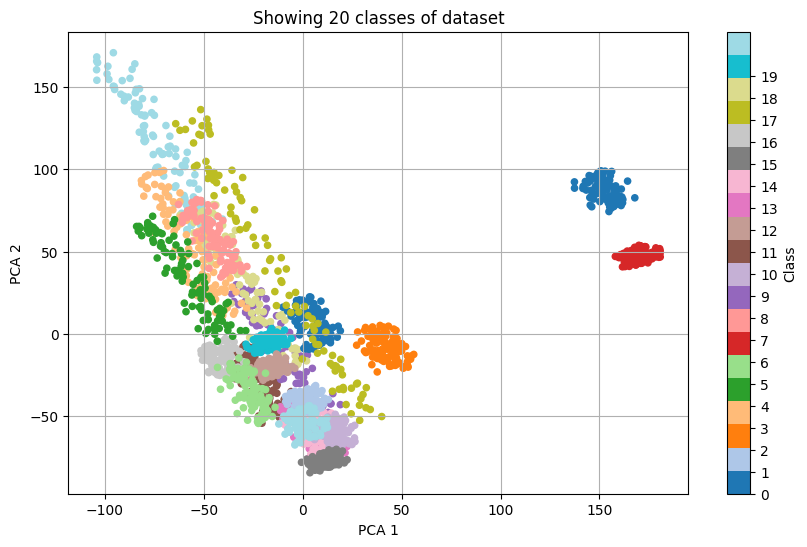

In [78]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='tab20', s=20)
plt.colorbar(scatter, ticks=range(20), label="Class")
plt.title("Showing 20 classes of dataset")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()